In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Public\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("D:\Data Analysis\Assignments\Logistics-Regression-Assignment\census-income .csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.sample(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
23520,22,Federal-gov,262819,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
22406,31,Private,169002,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,55,United-States,<=50K
12403,22,Private,264874,HS-grad,9,Never-married,Craft-repair,Own-child,White,Female,0,0,40,United-States,<=50K
5161,32,Private,194987,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,40,United-States,<=50K
19788,17,?,170320,11th,7,Never-married,?,Own-child,White,Female,0,0,8,United-States,<=50K


In [20]:
df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('-','.')

In [7]:
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
#1. How many types of occupations do we have?
len(df.occupation.unique())
#c. 15

15

In [52]:
df.replace('>50K',1,inplace=True)
df.replace('<=50K',0,inplace=True)
df

C:\Users\KISHOR WAGH\AppData\Local\Temp\ipykernel_17880\201293415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('>50K',1,inplace=True)
C:\Users\KISHOR WAGH\AppData\Local\Temp\ipykernel_17880\201293415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('<=50K',0,inplace=True)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [53]:
#2. How many people are working as tech support and have an annual income
#greater than 50k?

len(df[(df['occupation']=='Tech-support') & (df['annual_income']==1)])
#a. 278

278

In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
annual_income     0
dtype: int64

In [28]:
#3. How many total missing values are present in the dataset?
df1 = df.iloc[:,[1,6,13]]
s=0
for i in df1.columns:
    x=len(df1[df1[i]=='?'])
    s+=x
print(s)
#a. 4262

4262


In [29]:
#4. If there are missing values in the Marital Status column, which option among
#the following should be used for replacing the missing values:
#c. Mode

In [36]:
df.replace('?',np.nan,inplace=True)

In [41]:
df=df.dropna()

In [42]:
#5. How many people are having private work classes and are not from the
#United States of America?
len(df[(df['workclass']=='Private')&(df['native.country']!='United-States')])
#a. 2151


2151

In [57]:
#6. How many people are either having Annual Income(last column) less than or
#equal to 50k or their working hours is greater than or equal to 40 hrs:
len(df[(df['annual_income']==0) | (df['hours.per.week']>=40)])
#c. 29505

29505

In [58]:
#7. Which of the following methods can you use for handling outliers?
#a. Interquartile Range(IQR) Method

In [59]:
#8. Chi-square is used to analyze:
#c. both a and b

In [60]:
#9. What is VIF?
#a. It can detect multicollinearity

In [62]:
#10.What predict_proba will tell you?
#a. It will predict the class probabilities

In [61]:
#11.Logistic regression is useful for regression problems:
#b. False

In [63]:
#12.In logistic regression, if the predicted logit is 0, what’s the
#transformed probability?
#a. 0.5

In [64]:
#13.Which variant of logistic regression is recommended when you have
#a categorical dependent variable with more than two values?
#b. Multinomial logistic regression

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
L = LabelEncoder()

In [69]:
cat_columns = [i for i in df.columns if df[i].dtypes=='object']

In [71]:
for i in cat_columns:
    df[i]=L.fit_transform(df[i])

C:\Users\KISHOR WAGH\AppData\Local\Temp\ipykernel_17880\3838699104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=L.fit_transform(df[i])


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int32
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int32
 4   education.num   30162 non-null  int64
 5   marital.status  30162 non-null  int32
 6   occupation      30162 non-null  int32
 7   relationship    30162 non-null  int32
 8   race            30162 non-null  int32
 9   sex             30162 non-null  int32
 10  capital.gain    30162 non-null  int64
 11  capital.loss    30162 non-null  int64
 12  hours.per.week  30162 non-null  int64
 13  native.country  30162 non-null  int32
 14  annual_income   30162 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.8 MB


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [75]:
lr = LogisticRegression()

In [79]:
X = df.iloc[:,:14]

In [80]:
y = df.iloc[:,14]

In [82]:
X.shape,y.shape

((30162, 14), (30162,))

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
lr.fit(X_train,y_train)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
y_pred=lr.predict(X_test)

In [88]:
accuracy_score(y_pred,y_test)

0.7926842745054702

In [89]:
#14.What is the accuracy score of the above model?
#c. 0.70 to 0.85

In [93]:
cm = confusion_matrix(y_test, y_pred)

In [94]:
cm

array([[6627,  137],
       [1739,  546]], dtype=int64)

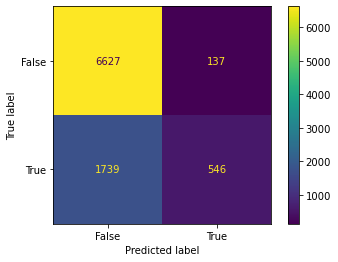

In [98]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [119]:
#15.What is the specificity of the above model?
cm[0][0]/(cm[0][0]+cm[0][1])
#d.None of the above

0.979745712596097

In [102]:
#16.What is the model’s precision when the target is False?
#c. 0.70 to 0.80

0.7994143484626647

In [120]:
#17.What is the total support value from the above model?
cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
#a. 9049

9049

In [116]:
#18.What is the f1 score of the above model when the target is
#True?
print(f1_score(y_pred,y_test))
print(2*(((cm[1][1]/(cm[1][1]+cm[0][1]))*(cm[1][1]/(cm[1][1]+cm[1][0])))/((cm[1][1]/(cm[1][1]+cm[1][0]))+(cm[1][1]/(cm[1][1]+cm[0][1])))))
#a. 0.30 to 0.40

0.3679245283018867
0.3679245283018867


In [112]:
#19.How many records are correctly classified by the
#model?
cm[0][0]+cm[1][1]
#a. 7173


7173